In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize': (9, 6)})

In [4]:
events_data = pd.read_csv('event_data_train.csv')

In [5]:
events_data.head(10)

step_id   timestamp           action  user_id
0    32815  1434340848           viewed    17632
1    32815  1434340848           passed    17632
2    32815  1434340848       discovered    17632
3    32811  1434340895       discovered    17632
4    32811  1434340895           viewed    17632
5    32811  1434340895           passed    17632
6    32929  1434340921       discovered    17632
7    32929  1434340921           viewed    17632
8    32929  1434340939  started_attempt    17632
9    32929  1434340944           passed    17632

In [6]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [8]:
events_data.head(10)

step_id   timestamp           action  user_id                date
0    32815  1434340848           viewed    17632 2015-06-15 04:00:48
1    32815  1434340848           passed    17632 2015-06-15 04:00:48
2    32815  1434340848       discovered    17632 2015-06-15 04:00:48
3    32811  1434340895       discovered    17632 2015-06-15 04:01:35
4    32811  1434340895           viewed    17632 2015-06-15 04:01:35
5    32811  1434340895           passed    17632 2015-06-15 04:01:35
6    32929  1434340921       discovered    17632 2015-06-15 04:02:01
7    32929  1434340921           viewed    17632 2015-06-15 04:02:01
8    32929  1434340939  started_attempt    17632 2015-06-15 04:02:19
9    32929  1434340944           passed    17632 2015-06-15 04:02:24

In [9]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [10]:
events_data.date.min(), events_data.date.max()

(Timestamp('2015-06-15 04:00:48'), Timestamp('2018-05-19 23:33:31'))

In [11]:
events_data['day'] = events_data.date.dt.date

In [12]:
events_data.head()

step_id   timestamp      action  user_id                date         day
0    32815  1434340848      viewed    17632 2015-06-15 04:00:48  2015-06-15
1    32815  1434340848      passed    17632 2015-06-15 04:00:48  2015-06-15
2    32815  1434340848  discovered    17632 2015-06-15 04:00:48  2015-06-15
3    32811  1434340895  discovered    17632 2015-06-15 04:01:35  2015-06-15
4    32811  1434340895      viewed    17632 2015-06-15 04:01:35  2015-06-15

<AxesSubplot:xlabel='day'>

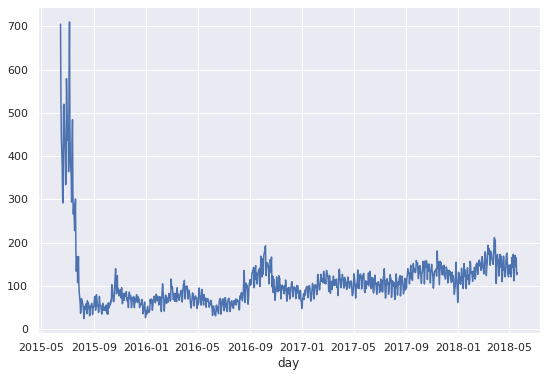

In [13]:
events_data.groupby('day').user_id.nunique().plot()

<AxesSubplot:>

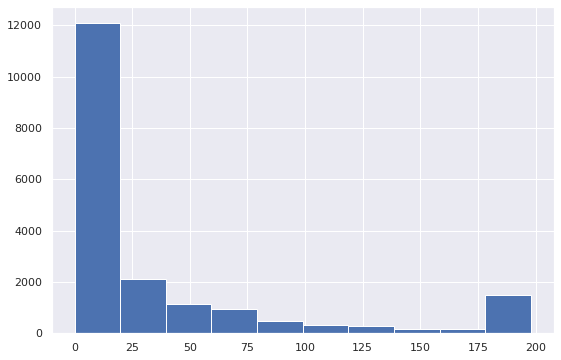

In [14]:
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index().discovered.hist()

In [15]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [16]:
submissions_data.head()

step_id   timestamp submission_status  user_id
0    31971  1434349275           correct    15853
1    31972  1434348300           correct    15853
2    31972  1478852149             wrong    15853
3    31972  1478852164           correct    15853
4    31976  1434348123             wrong    15853

In [17]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [18]:
submissions_data.head()

step_id   timestamp submission_status  user_id                date  \
0    31971  1434349275           correct    15853 2015-06-15 06:21:15   
1    31972  1434348300           correct    15853 2015-06-15 06:05:00   
2    31972  1478852149             wrong    15853 2016-11-11 08:15:49   
3    31972  1478852164           correct    15853 2016-11-11 08:16:04   
4    31976  1434348123             wrong    15853 2015-06-15 06:02:03   

          day  
0  2015-06-15  
1  2015-06-15  
2  2016-11-11  
3  2016-11-11  
4  2015-06-15

In [19]:
users_scores = submissions_data.pivot_table(index='user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

In [20]:
users_scores.head()

submission_status  user_id  correct  wrong
0                        2        2      0
1                        3       29     23
2                        5        2      2
3                        8        9     21
4                       14        0      1

In [21]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

In [22]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [23]:
gap_data = gap_data / (24 * 60 * 60)

<AxesSubplot:>

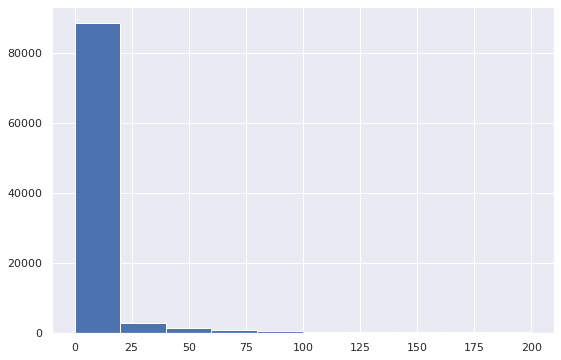

In [24]:
gap_data[gap_data < 200].hist()

In [25]:
gap_data.quantile(0.95)

59.760440972222156

In [26]:
gap_data.quantile(0.90)

18.325995370370403

In [27]:
30 * 24 * 60 * 60

2592000

In [28]:
events_data.tail()

step_id   timestamp      action  user_id                date  \
3480698    33375  1526772685      viewed    11677 2018-05-19 23:31:25   
3480699    32815  1526772750      viewed     5198 2018-05-19 23:32:30   
3480700    32815  1526772750  discovered     5198 2018-05-19 23:32:30   
3480701    32815  1526772750      passed     5198 2018-05-19 23:32:30   
3480702    33892  1526772811      viewed    18526 2018-05-19 23:33:31   

                day  
3480698  2018-05-19  
3480699  2018-05-19  
3480700  2018-05-19  
3480701  2018-05-19  
3480702  2018-05-19

In [29]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'max'}) \
    .rename(columns={'timestamp': 'last_timestamp'})

In [30]:
users_data

user_id  last_timestamp
0            1      1472827464
1            2      1519226966
2            3      1444581588
3            5      1499859939
4            7      1521634660
...        ...             ...
19229    26790      1517495987
19230    26793      1510225034
19231    26794      1512035039
19232    26797      1509995096
19233    26798      1520978742

[19234 rows x 2 columns]

In [31]:
users_data['is_gone_user'] = (1526772811 - users_data.last_timestamp) > 2592000

In [32]:
users_data.head()

user_id  last_timestamp  is_gone_user
0        1      1472827464          True
1        2      1519226966          True
2        3      1444581588          True
3        5      1499859939          True
4        7      1521634660          True

In [33]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [34]:
users_data = users_data.fillna(0)

In [35]:
users_data

user_id  last_timestamp  is_gone_user  correct  wrong
0            1      1472827464          True      0.0    0.0
1            2      1519226966          True      2.0    0.0
2            3      1444581588          True     29.0   23.0
3            5      1499859939          True      2.0    2.0
4            7      1521634660          True      0.0    0.0
...        ...             ...           ...      ...    ...
19229    26790      1517495987          True      1.0    0.0
19230    26793      1510225034          True      0.0    0.0
19231    26794      1512035039          True     33.0    9.0
19232    26797      1509995096          True      2.0    0.0
19233    26798      1520978742          True      2.0    1.0

[19234 rows x 5 columns]

In [36]:
users_events_data = events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

In [37]:
users_events_data.head()

action  user_id  discovered  passed  started_attempt  viewed
0             1           1       0                0       1
1             2           9       9                2      10
2             3          91      87               30     192
3             5          11      11                4      12
4             7           1       1                0       1

In [38]:
users_data = users_data.merge(users_events_data, on='user_id', how='outer')

In [39]:
users_data.head()

user_id  last_timestamp  is_gone_user  correct  wrong  discovered  passed  \
0        1      1472827464          True      0.0    0.0           1       0   
1        2      1519226966          True      2.0    0.0           9       9   
2        3      1444581588          True     29.0   23.0          91      87   
3        5      1499859939          True      2.0    2.0          11      11   
4        7      1521634660          True      0.0    0.0           1       1   

   started_attempt  viewed  
0                0       1  
1                2      10  
2               30     192  
3                4      12  
4                0       1

In [40]:
users_days = events_data.groupby('user_id').day.nunique()

In [41]:
users_days.to_frame().reset_index()

user_id  day
0            1    1
1            2    2
2            3    7
3            5    2
4            7    1
...        ...  ...
19229    26790    4
19230    26793    1
19231    26794    9
19232    26797    2
19233    26798    1

[19234 rows x 2 columns]

In [42]:
users_data = users_data.merge(users_days, on='user_id', how='outer')

In [43]:
users_data.head()

user_id  last_timestamp  is_gone_user  correct  wrong  discovered  passed  \
0        1      1472827464          True      0.0    0.0           1       0   
1        2      1519226966          True      2.0    0.0           9       9   
2        3      1444581588          True     29.0   23.0          91      87   
3        5      1499859939          True      2.0    2.0          11      11   
4        7      1521634660          True      0.0    0.0           1       1   

   started_attempt  viewed  day  
0                0       1    1  
1                2      10    2  
2               30     192    7  
3                4      12    2  
4                0       1    1

In [44]:
users_data['passed_course'] = users_data.passed > 170

In [45]:
users_data.head()

user_id  last_timestamp  is_gone_user  correct  wrong  discovered  passed  \
0        1      1472827464          True      0.0    0.0           1       0   
1        2      1519226966          True      2.0    0.0           9       9   
2        3      1444581588          True     29.0   23.0          91      87   
3        5      1499859939          True      2.0    2.0          11      11   
4        7      1521634660          True      0.0    0.0           1       1   

   started_attempt  viewed  day  passed_course  
0                0       1    1          False  
1                2      10    2          False  
2               30     192    7          False  
3                4      12    2          False  
4                0       1    1          False

In [46]:
users_data.groupby('passed_course').count()

user_id  last_timestamp  is_gone_user  correct  wrong  \
passed_course                                                          
False            17809           17809         17809    17809  17809   
True              1425            1425          1425     1425   1425   

               discovered  passed  started_attempt  viewed    day  
passed_course                                                      
False               17809   17809            17809   17809  17809  
True                 1425    1425             1425    1425   1425

In [47]:
100 * 1425 / 17809

8.001572238755685